ABSTRACT:

According to the dataset considered, this situation deals with violation of laws
and the features related to citations in court from different areas for different people. Most of the times
when there is violation of law, the authorities settle it using charges. Few times there are cases where people are charged without commiting any violations or there are cases where people resist the charges
for a inevitable reason. so in this work, for a citation, we are going to find if the hearing Status is issued or not
meaning we are trying to understand how features of citations are affecting people who face any hearing status
and people who don't have one. This helps us to know better about the current mindset of people and the mistakes
made by them and in-turn provide a analysis for judistriction for easy flow of their work.

IMPORTING LIBRARIES:

In [1]:
# handling the tabular data
import numpy as np
import pandas as pd

# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
# Data pre-processing 
from sklearn.preprocessing import LabelEncoder
# Data Cross Validation or Model Selection
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV

# Algorithms 
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay,roc_curve,auc

Data Acquisition:

In [3]:
data = pd.read_csv("/content/Environmental_Citations (5).csv")
data

,CitationNo,LienCode,ViolationDate,DueDate,Agency,FineAmount,Description,Balance,LastPaidDate,LastPaidAmount,...,HearingStatus,HearTime,TotalPaid,TotalAbated,TotalVoided,Neighborhood,PoliceDistrict,CouncilDistrict,Location,ESRI_OID
0,2313252,L,2009/01/26 05:00:00+00,2009/02/25 05:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30793364,-76.65344787)",3.0
1,2708147,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27839051,-76.69754927)",1.0
2,2708154,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27860883,-76.69752023)",2.0
3,2708162,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27888220,-76.69748387)",4.0
4,2810646,L,2005/07/06 04:00:00+00,2005/08/05 04:00:00+00,BALTIMORE CITY POLICE DEPARTMENT ...,60,HIGH GRASS AND WEEDS ...,180.0,NaN,0.0,...,,,0.0,0.0,0.0,Central Park Heights,Northwestern,6.0,"(39.34586982,-76.67082210)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169379,55883904,L,2020/08/03 04:00:00+00,2020/09/04 04:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,HIGH GRASS AND WEEDS ...,50.0,2020/11/12 05:00:00+00,75.0,...,,,75.0,0.0,0.0,Morrell Park,Southwestern,10.0,"(39.26482347,-76.65098439)",6883.0
169380,55883912,L,2020/08/03 04:00:00+00,2020/09/04 04:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,TRASH ACCUMULATION ...,50.0,2020/11/12 05:00:00+00,75.0,...,,,75.0,0.0,0.0,Morrell Park,Southwestern,10.0,"(39.26482347,-76.65098439)",6884.0
169381,55883920,L,2020/08/03 04:00:00+00,2020/09/04 04:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,TRASH ACCUMULATION ...,150.0,NaN,0.0,...,,,0.0,0.0,0.0,Morrell Park,Southwestern,10.0,"(39.26630612,-76.65249018)",6885.0
169382,55883938,L,2020/08/03 04:00:00+00,2020/09/04 04:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,50,CONSTRUCTION AND MAINTENANCE OF STORAGE RECEPT...,150.0,NaN,0.0,...,,,0.0,0.0,0.0,Morrell Park,Southwestern,10.0,"(39.26630612,-76.65249018)",6886.0


As data is very large, we are considering only a sample which we can handle

In [4]:
data = data.iloc[:50000,:]
data

,CitationNo,LienCode,ViolationDate,DueDate,Agency,FineAmount,Description,Balance,LastPaidDate,LastPaidAmount,...,HearingStatus,HearTime,TotalPaid,TotalAbated,TotalVoided,Neighborhood,PoliceDistrict,CouncilDistrict,Location,ESRI_OID
0,2313252,L,2009/01/26 05:00:00+00,2009/02/25 05:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Coppin Heights/Ash-Co-East,Western,7.0,"(39.30793364,-76.65344787)",3.0
1,2708147,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27839051,-76.69754927)",1.0
2,2708154,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27860883,-76.69752023)",2.0
3,2708162,L,2009/09/09 04:00:00+00,2009/10/09 04:00:00+00,BALTIMORE CITY HEALTH DEPARTMENT ...,100,FAILURE TO REMOVE OR ABATE ALL NUISANCES/FAILU...,300.0,NaN,0.0,...,,,0.0,0.0,0.0,Beechfield,Southwestern,8.0,"(39.27888220,-76.69748387)",4.0
4,2810646,L,2005/07/06 04:00:00+00,2005/08/05 04:00:00+00,BALTIMORE CITY POLICE DEPARTMENT ...,60,HIGH GRASS AND WEEDS ...,180.0,NaN,0.0,...,,,0.0,0.0,0.0,Central Park Heights,Northwestern,6.0,"(39.34586982,-76.67082210)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,53689436,L,2015/01/22 05:00:00+00,2015/02/21 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,FAILURE TO FILE A COMPLETED ANNUAL REGISTRATIO...,0.0,2022/04/13 04:00:00+00,300.0,...,,,300.0,0.0,0.0,Harwood,Northern,12.0,"(39.32194481,-76.61133401)",49996.0
49996,53689527,L,2015/01/22 05:00:00+00,2015/02/21 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,FAILURE TO FILE A COMPLETED ANNUAL REGISTRATIO...,0.0,2018/05/14 04:00:00+00,300.0,...,,,300.0,0.0,0.0,Penn North,Western,7.0,"(39.31074910,-76.63804690)",49997.0
49997,53689634,L,2015/01/22 05:00:00+00,2015/02/21 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,HIGH GRASS AND WEEDS ...,0.0,2018/05/14 04:00:00+00,300.0,...,,,300.0,0.0,0.0,Belair-Edison,Notheastern,13.0,"(39.32107415,-76.57389826)",49998.0
49998,53689675,L,2015/01/23 05:00:00+00,2015/02/22 05:00:00+00,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,UNREGISTERED OR INOPERABLE VEHICLE ...,115.0,NaN,0.0,...,GU,1100A,0.0,0.0,0.0,Belair-Edison,Notheastern,13.0,"(39.32117274,-76.57378310)",49999.0


Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CitationNo                  50000 non-null  int64  
 1   LienCode                    50000 non-null  object 
 2   ViolationDate               50000 non-null  object 
 3   DueDate                     50000 non-null  object 
 4   Agency                      50000 non-null  object 
 5   FineAmount                  50000 non-null  int64  
 6   Description                 50000 non-null  object 
 7   Balance                     50000 non-null  float64
 8   LastPaidDate                7725 non-null   object 
 9   LastPaidAmount              50000 non-null  float64
 10  HearingDate                 4538 non-null   object 
 11  HearingRequestReceivedDate  3509 non-null   object 
 12  CitationStatus              50000 non-null  object 
 13  ViolationCodeArticle        500

In [6]:
data.ViolationCodeSection.value_counts()

305.2.2       5411
4-5A.2        3991
306.2         3114
306.1         2959
306.3B        2905
              ... 
62.              1
62..             1
307.2.2          1
3409.3.3         1
38-19            1
Name: ViolationCodeSection, Length: 195, dtype: int64

In [7]:
data.Block.value_counts()

         7366
7492C     222
5210E     152
3301      133
0271      110
         ... 
5570E       1
4218H       1
8252        1
4429D       1
5477        1
Name: Block, Length: 3405, dtype: int64

In [8]:
data.Lot.value_counts()

        7368
001     1242
011      845
006      810
008      800
        ... 
028D       1
584        1
594        1
054D       1
708        1
Name: Lot, Length: 818, dtype: int64

In [9]:
data.Neighborhood.value_counts()

Broadway East                      8797
Carrollton Ridge                   1629
Central Park Heights               1423
Belair-Edison                      1311
Coldstream Homestead Montebello    1210
                                   ... 
Rosebank                              1
Tuscany-Canterbury                    1
Wyndhurst                             1
Dunbar-Broadway                       1
Wakefield                             1
Name: Neighborhood, Length: 249, dtype: int64

removing the columns which are insignificant
1. columns with large number of unique values
2. i am not performing time series analysis.as it is difficult to obtain appropriate measures, and there are problems with accurately identifying the correct model to represent the data. so, removing the columns with time related data.

In [10]:
data.drop(columns=["CitationNo","ViolationDate","DueDate",
                   "ESRI_OID","Location","OfficerID","Description",
                   "LastPaidDate","HearingDate","HearingRequestReceivedDate",
                   "ViolationLocation","ViolationCodeSection","Block","Lot",
                   "HearTime","Neighborhood","Location"],inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LienCode,Agency,FineAmount,Balance,LastPaidAmount,CitationStatus,ViolationCodeArticle,OfficerPresenceRequested,HearingStatus,TotalPaid,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict
0,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Western,7.0
1,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
2,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
3,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
4,L,BALTIMORE CITY POLICE DEPARTMENT ...,60,180.0,0.0,O,03,,,0.0,0.0,0.0,Northwestern,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,0.0,300.0,P,13,,,300.0,0.0,0.0,Northern,12.0
49996,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,0.0,300.0,P,13,,,300.0,0.0,0.0,Western,7.0
49997,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,0.0,300.0,P,PM,,,300.0,0.0,0.0,Notheastern,13.0
49998,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,115.0,0.0,O,PM,Y,GU,0.0,0.0,0.0,Notheastern,13.0


Exploratory Data Analysis

understanding all the different categorical column's with data distributions

In [11]:
for i in data.columns:
    if str(data[i].dtype) == "object":
      print(i)

LienCode
Agency
CitationStatus
ViolationCodeArticle
OfficerPresenceRequested
HearingStatus
PoliceDistrict


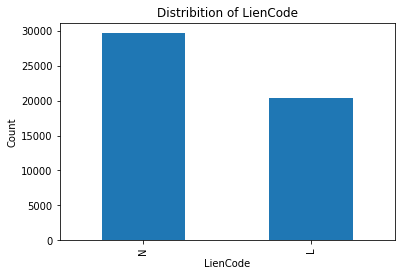

In [ ]:
data['LienCode'].value_counts().plot(kind='bar',xlabel='LienCode',ylabel='Count',title='Distribition of LienCode')

This plot shows the information of distribution of lien code from the figure we can observe that lien code type n has the highest number of records when compared to the other type.

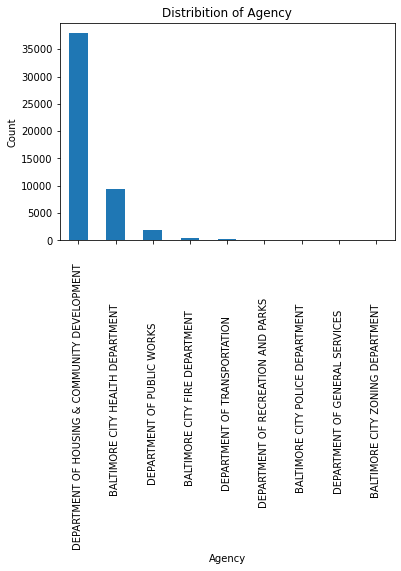

In [12]:
data['Agency'].value_counts().plot(kind='bar',xlabel='Agency',ylabel='Count',title='Distribition of Agency')

This plot shows the information of distribution of agency.From the figure we can observe that the department of housing and community development type  has the highest number of records when compared to the other type.

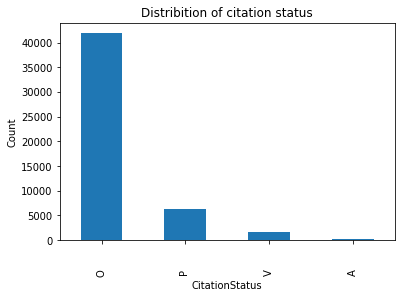

In [13]:
data['CitationStatus'].value_counts().plot(kind='bar',xlabel='CitationStatus',ylabel='Count',title='Distribition of citation status')

This plot shows the information of distribution of citationstatus.From the figure we can observe that the type occured(o) has the highest number of records when compared to the other type.

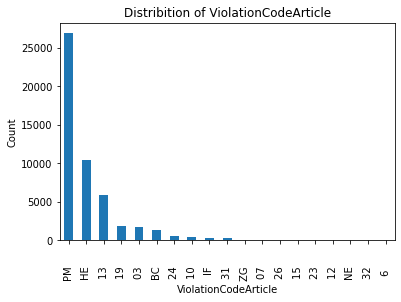

In [14]:
data['ViolationCodeArticle'].value_counts().plot(kind='bar',xlabel='ViolationCodeArticle',ylabel='Count',title='Distribition of ViolationCodeArticle')

This plot shows the information of distribution of violationcode article.From the figure we can observe that the type PM has the highest number of records when compared to the other type.

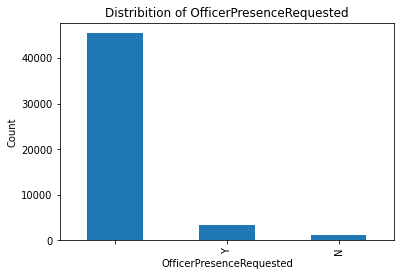

In [15]:
data['OfficerPresenceRequested'].value_counts().plot(kind='bar',xlabel='OfficerPresenceRequested',ylabel='Count',title='Distribition of OfficerPresenceRequested')

This plot shows the information of distribution of officer presence requested.From the figure we can observe that the type yes has the highest number of records when compared to the other type.

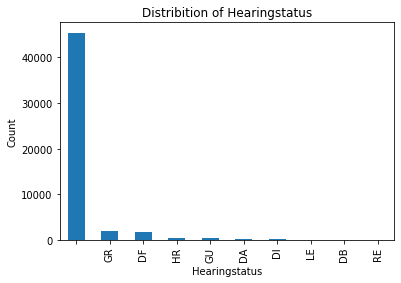

In [16]:
data['HearingStatus'].value_counts().plot(kind='bar',xlabel='Hearingstatus',ylabel='Count',title='Distribition of Hearingstatus')

This plot shows the information of distribution of hearing status.From the figure we can observe that the type GR has the highest number of records when compared to the other type.

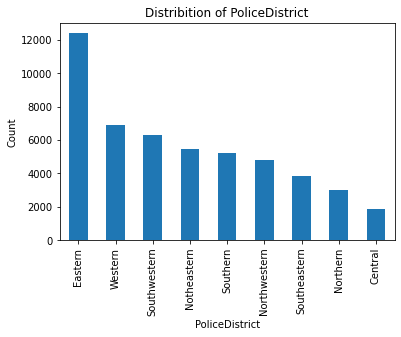

In [17]:
data['PoliceDistrict'].value_counts().plot(kind='bar',xlabel='PoliceDistrict',ylabel='Count',title='Distribition of PoliceDistrict')

This plot shows the information of distribution of police district.From the figure we can observe that the eastern police district has the highest number of records when compared to the other type.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


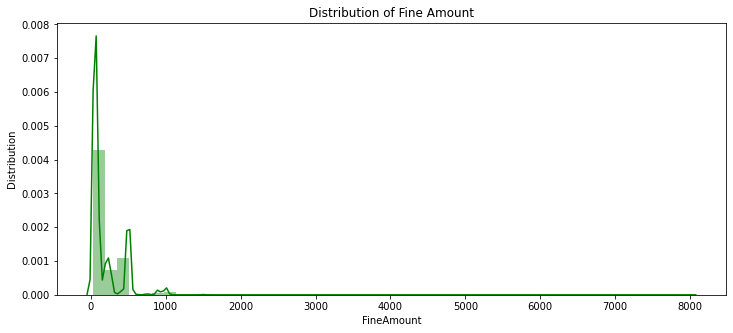

In [18]:
plt.figure(figsize=(12,5))
(sns.distplot(data['FineAmount'],bins=50,kde=True,color = "green"))
plt.xlabel('FineAmount')
plt.ylabel('Distribution')
plt.title('Distribution of Fine Amount')
plt.show()


This distplot shows the information of distribution of fine amount.it can be observed that most people paid a fine amount in between 0 to 1000.the highest fine amount would be 800.

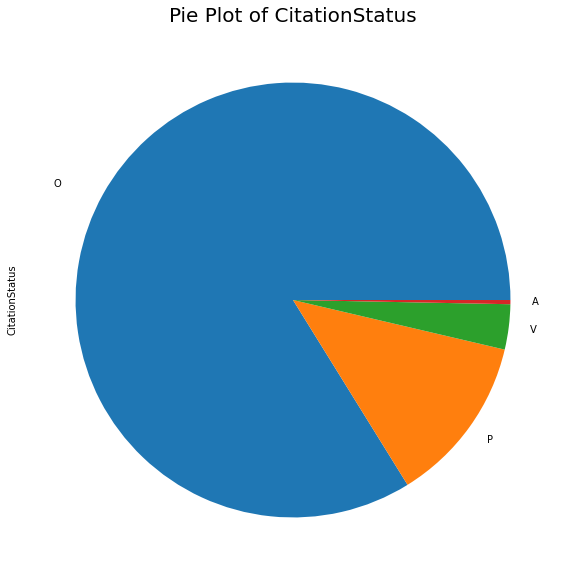

In [19]:
f,ax=plt.subplots(figsize=(20,10))
data['CitationStatus'].value_counts().plot(kind='pie')
plt.title("Pie Plot of CitationStatus", fontsize = 20)
plt.show();

The above pie plot is for citation status it can be observed that the citation status is occured for almost all the citations.Here 
o stands for-occured
p-passed
v-violated
a-abscond

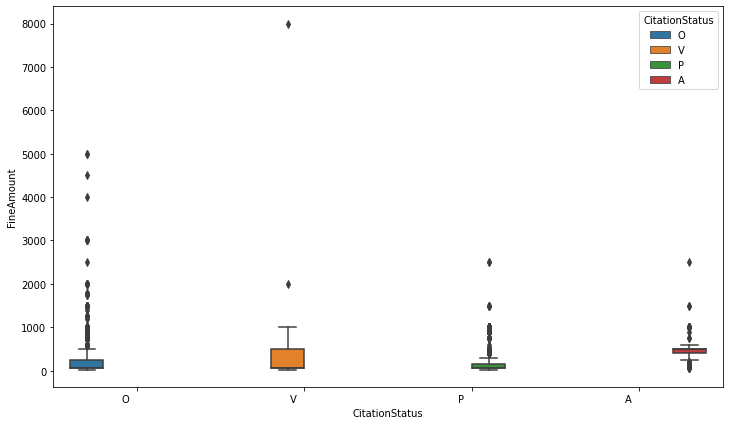

In [20]:
f,ax=plt.subplots(figsize=(12,7))
sns.boxplot(x=data['CitationStatus'],y=data['FineAmount'],hue=data['CitationStatus'])

it is observed from the box plot that when ever the citation status is occured 
there were fines collected from $0  to  $1000

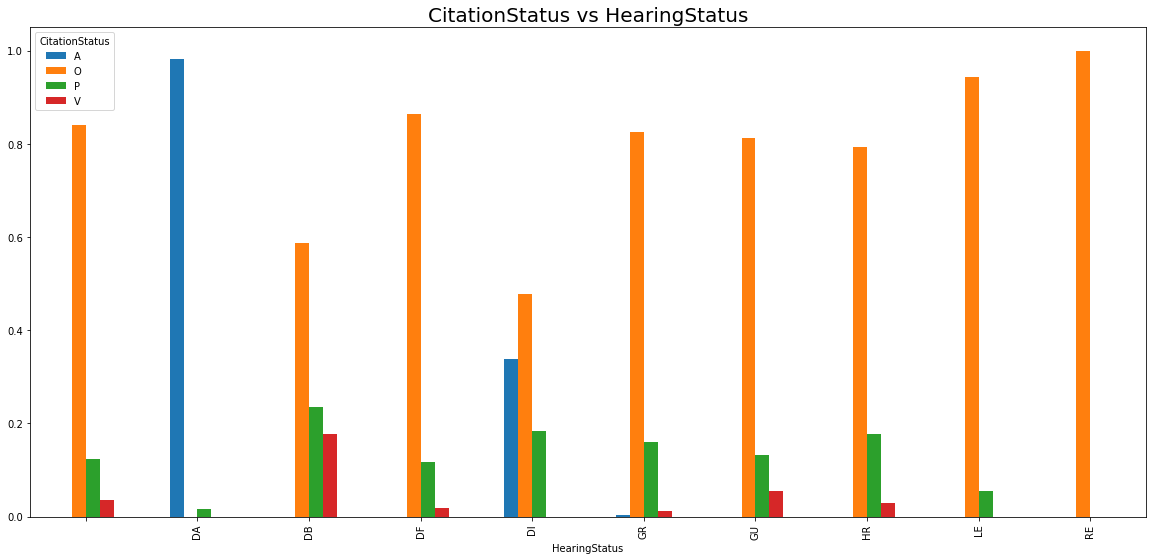

In [21]:
plt.rcParams['figure.figsize'] = (20,9)
x = pd.crosstab(data['HearingStatus'],data['CitationStatus'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('CitationStatus vs HearingStatus',fontweight = 30,fontsize = 20)
plt.show()


The Citations with O (Occured) Category has more data points in DB, DF, DI, GR, GU, HR, LE, RE Hearing status. The other citation status has less in number when compared to the O category type. 

#FUTURE ENGINEERING:#

HANDLING THE MISSING VALUES:

In [22]:
data.isna().sum()

LienCode                      0
Agency                        0
FineAmount                    0
Balance                       0
LastPaidAmount                0
CitationStatus                0
ViolationCodeArticle          0
OfficerPresenceRequested      0
HearingStatus                 0
TotalPaid                     0
TotalAbated                   0
TotalVoided                   0
PoliceDistrict              213
CouncilDistrict             212
dtype: int64

In [23]:
print(f"approximate percentage of missing values: {222/50000} %")

approximate percentage of missing values: 0.00444 %


Removing all the rows where there are missing values, as the percentage of missing values is very less

In [24]:
data.dropna(inplace=True)
data.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


LienCode                    0
Agency                      0
FineAmount                  0
Balance                     0
LastPaidAmount              0
CitationStatus              0
ViolationCodeArticle        0
OfficerPresenceRequested    0
HearingStatus               0
TotalPaid                   0
TotalAbated                 0
TotalVoided                 0
PoliceDistrict              0
CouncilDistrict             0
dtype: int64

2. Handling the Outliers

Finding the Outliers using different methods and removing them

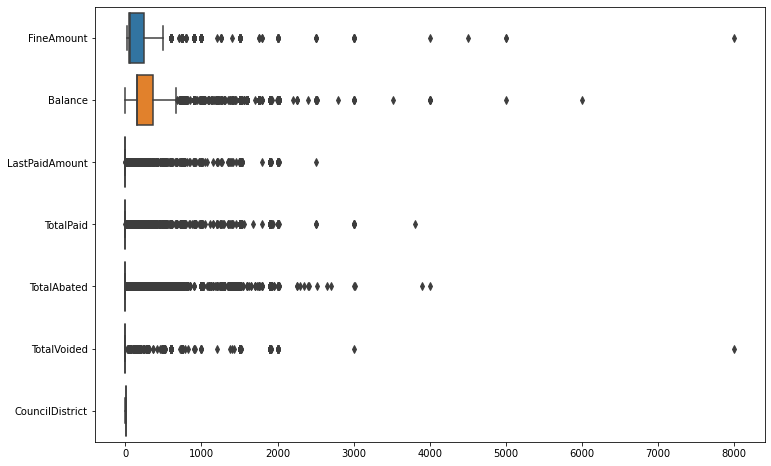

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data,orient="h")
plt.show()

Using the Isolation Forest algorithm to finalize on the outliers

In [26]:
IF = IsolationForest(random_state=5)
outliers = IF.fit_predict(data[["FineAmount","Balance","LastPaidAmount","TotalAbated","TotalPaid","TotalVoided","CouncilDistrict"]].values)
data = data[outliers!=-1]
data

,LienCode,Agency,FineAmount,Balance,LastPaidAmount,CitationStatus,ViolationCodeArticle,OfficerPresenceRequested,HearingStatus,TotalPaid,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict
0,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Western,7.0
1,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
2,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
3,L,BALTIMORE CITY HEALTH DEPARTMENT ...,100,300.0,0.0,O,HE,,,0.0,0.0,0.0,Southwestern,8.0
4,L,BALTIMORE CITY POLICE DEPARTMENT ...,60,180.0,0.0,O,03,,,0.0,0.0,0.0,Northwestern,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,0.0,150.0,P,13,,,300.0,0.0,0.0,Northwestern,6.0
49990,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,0.0,200.0,P,13,,,300.0,0.0,0.0,Southwestern,8.0
49991,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,300.0,0.0,O,13,,,0.0,0.0,0.0,Western,9.0
49998,L,DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT ...,100,115.0,0.0,O,PM,Y,GU,0.0,0.0,0.0,Notheastern,13.0


After outlier removal using the Isolation Forest.

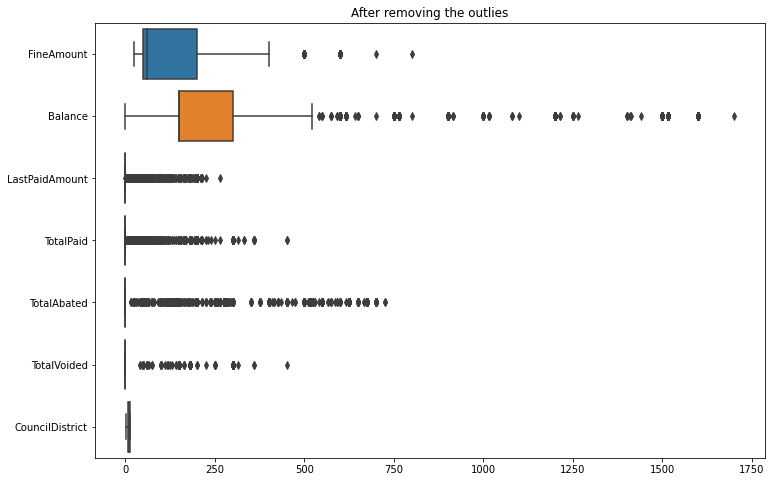

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data,orient="h")
plt.title("After removing the outlies")
plt.show()

Handling the object/categorical type of columns

In [28]:
df = data.copy(deep=True)

df.LienCode.replace({'L':1, 'N':0},inplace=True)
df.OfficerPresenceRequested.replace({' ':"not_considered"},inplace=True)

le_VCA = LabelEncoder()
le_PD = LabelEncoder()
df.ViolationCodeArticle = le_VCA.fit_transform(data.ViolationCodeArticle)
df.PoliceDistrict = le_PD.fit_transform(data.PoliceDistrict)

agency_one_hot = pd.get_dummies(data.Agency,prefix="Agen")
CS_one_hot = pd.get_dummies(data.CitationStatus,prefix="CS")
OPR_one_hot = pd.get_dummies(df.OfficerPresenceRequested,prefix="OPR")
df = pd.concat([df,agency_one_hot,CS_one_hot,OPR_one_hot],axis=1)
df.drop(columns=["Agency","CitationStatus","OfficerPresenceRequested"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44651 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   LienCode                                                 44651 non-null  int64  
 1   FineAmount                                               44651 non-null  int64  
 2   Balance                                                  44651 non-null  float64
 3   LastPaidAmount                                           44651 non-null  float64
 4   ViolationCodeArticle                                     44651 non-null  int64  
 5   HearingStatus                                            44651 non-null  object 
 6   TotalPaid                                                44651 non-null  float64
 7   TotalAbated                                              44651 non-null  float64
 8   TotalVoided               

Setting the Features and Labels

In [ ]:
# selecting the Hearing-Status as labels 
# so as to predict in which instance people can got to that extent for violation charges

In [29]:
df.HearingStatus.unique()

array(['  ', 'DI', 'GR', 'HR', 'DF', 'GU', 'RE', 'DA', 'LE', 'DB'],
      dtype=object)

In [30]:
df.HearingStatus = df.HearingStatus.apply(lambda x: 1 if x!='  ' else 0)
df.HearingStatus.value_counts()

0    41587
1     3064
Name: HearingStatus, dtype: int64

In [ ]:
# if a citation has Hearing or not is only considered.

In [31]:
X = df.drop(columns=["HearingStatus"])
y = df.HearingStatus

EDA on the processed_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


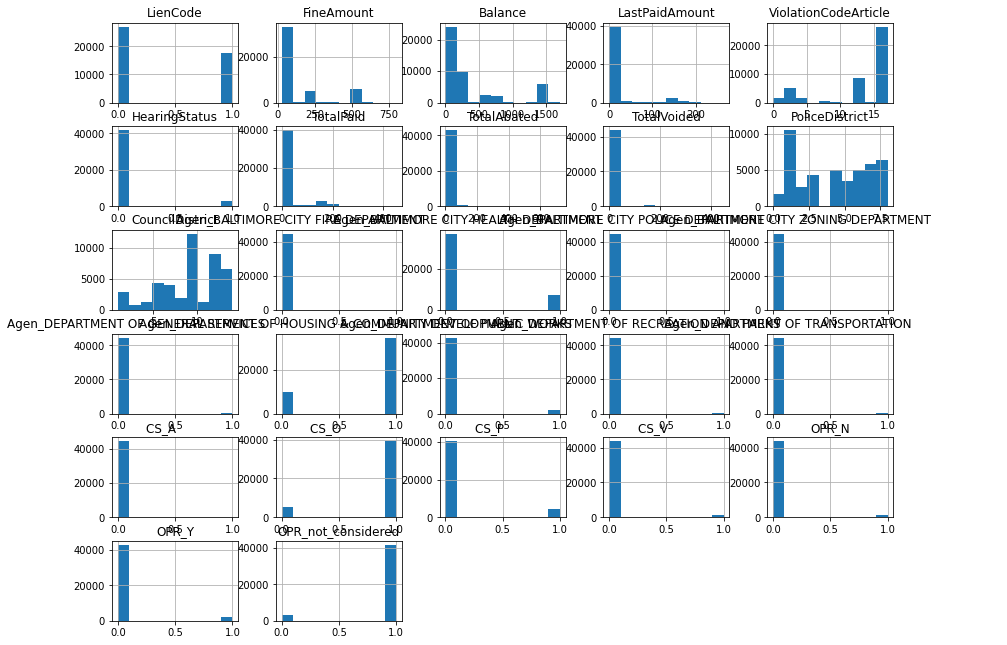

In [32]:
df.hist(figsize=(14,11))
plt.tight_layout()
plt.show()

Correlation matrix

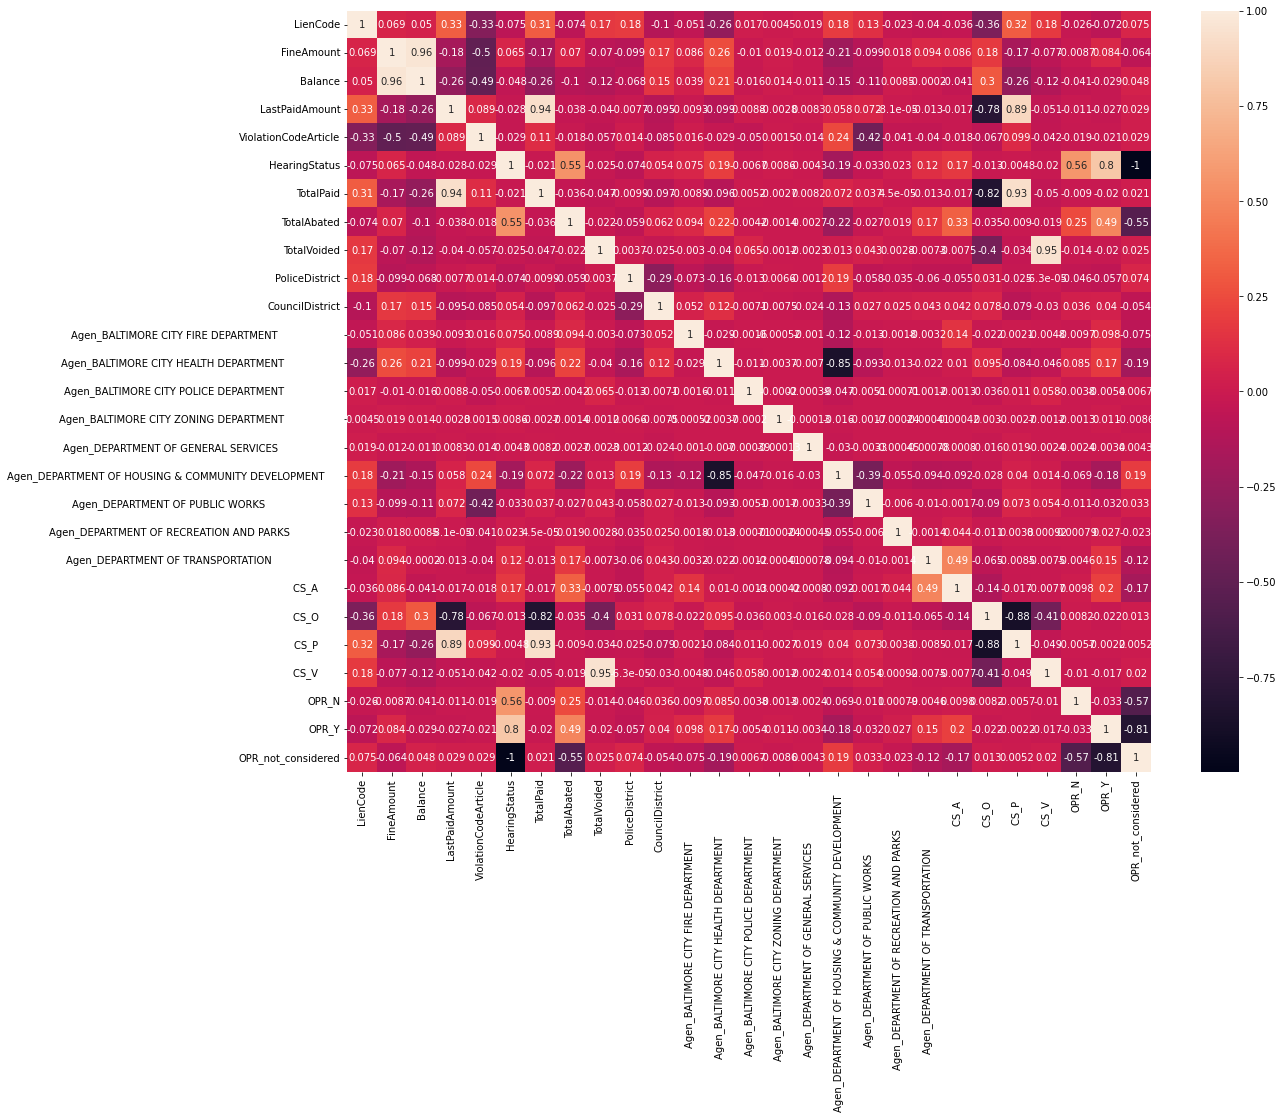

In [33]:
plt.figure(figsize=(18,14))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

4. Using High Correlation filter

In [34]:
removable_columns = set()
corr_mat = df.corr()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > 0.87:
            colname = corr_mat.columns[i]
            removable_columns.add(colname)
removable_columns

{'Balance', 'CS_P       ', 'CS_V       ', 'OPR_not_considered', 'TotalPaid'}

removing the columns with high correlation values

In [35]:
df.drop(columns=list(removable_columns),inplace=True)
df

,LienCode,FineAmount,LastPaidAmount,ViolationCodeArticle,HearingStatus,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict,Agen_BALTIMORE CITY FIRE DEPARTMENT,...,Agen_BALTIMORE CITY ZONING DEPARTMENT,Agen_DEPARTMENT OF GENERAL SERVICES,Agen_DEPARTMENT OF HOUSING & COMMUNITY DEVELOPMENT,Agen_DEPARTMENT OF PUBLIC WORKS,Agen_DEPARTMENT OF RECREATION AND PARKS,Agen_DEPARTMENT OF TRANSPORTATION,CS_A,CS_O,OPR_N,OPR_Y
0,1,100,0.0,13,0,0.0,0.0,8,7.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,100,0.0,13,0,0.0,0.0,7,8.0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,100,0.0,13,0,0.0,0.0,7,8.0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,100,0.0,13,0,0.0,0.0,7,8.0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,60,0.0,0,0,0.0,0.0,3,6.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,1,100,150.0,3,0,0.0,0.0,3,6.0,0,...,0,0,1,0,0,0,0,0,0,0
49990,1,100,200.0,3,0,0.0,0.0,7,8.0,0,...,0,0,1,0,0,0,0,0,0,0
49991,1,100,0.0,3,0,0.0,0.0,8,9.0,0,...,0,0,1,0,0,0,0,1,0,0
49998,1,100,0.0,16,1,0.0,0.0,4,13.0,0,...,0,0,1,0,0,0,0,1,0,1


Data Partitioning

As dataset is large. so, we are going with random samples for Training and Testing
going with random state '7' as it has more instances in minority class

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [37]:
X_train

,LienCode,FineAmount,Balance,LastPaidAmount,ViolationCodeArticle,TotalPaid,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict,...,Agen_DEPARTMENT OF PUBLIC WORKS,Agen_DEPARTMENT OF RECREATION AND PARKS,Agen_DEPARTMENT OF TRANSPORTATION,CS_A,CS_O,CS_P,CS_V,OPR_N,OPR_Y,OPR_not_considered
34908,0,200,600.0,0.0,13,0.0,0.0,0.0,7,9.0,...,0,0,0,0,1,0,0,0,0,1
15668,1,500,1500.0,0.0,3,0.0,0.0,0.0,1,13.0,...,0,0,0,0,1,0,0,0,0,1
18972,1,50,150.0,0.0,16,0.0,0.0,0.0,3,6.0,...,0,0,0,0,1,0,0,0,0,1
32838,1,60,0.0,180.0,16,180.0,0.0,0.0,2,4.0,...,0,0,0,0,0,1,0,0,0,1
7951,1,50,150.0,0.0,0,0.0,0.0,0.0,8,7.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37732,1,50,150.0,0.0,16,0.0,0.0,0.0,6,11.0,...,0,0,0,0,1,0,0,0,0,1
15808,0,50,150.0,0.0,16,0.0,0.0,0.0,4,13.0,...,0,0,0,0,1,0,0,0,0,1
946,1,50,150.0,0.0,0,0.0,0.0,0.0,1,13.0,...,1,0,0,0,1,0,0,0,0,1
42717,0,500,1500.0,0.0,13,0.0,0.0,0.0,6,10.0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
X_test

,LienCode,FineAmount,Balance,LastPaidAmount,ViolationCodeArticle,TotalPaid,TotalAbated,TotalVoided,PoliceDistrict,CouncilDistrict,...,Agen_DEPARTMENT OF PUBLIC WORKS,Agen_DEPARTMENT OF RECREATION AND PARKS,Agen_DEPARTMENT OF TRANSPORTATION,CS_A,CS_O,CS_P,CS_V,OPR_N,OPR_Y,OPR_not_considered
1281,1,50,150.0,0.0,0,0.0,0.0,0.0,8,7.0,...,1,0,0,0,1,0,0,0,0,1
22209,0,50,150.0,0.0,16,0.0,0.0,0.0,7,9.0,...,0,0,0,0,1,0,0,0,0,1
31522,1,500,1500.0,0.0,3,0.0,0.0,0.0,1,12.0,...,0,0,0,0,1,0,0,0,0,1
12059,1,100,300.0,0.0,3,0.0,0.0,0.0,8,9.0,...,0,0,0,0,1,0,0,0,0,1
39121,0,50,150.0,0.0,16,0.0,0.0,0.0,3,6.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12223,0,60,180.0,0.0,16,0.0,0.0,0.0,3,6.0,...,0,0,0,0,1,0,0,0,0,1
14805,1,50,150.0,0.0,16,0.0,0.0,0.0,3,6.0,...,0,0,0,0,1,0,0,0,0,1
3419,1,250,250.0,0.0,13,0.0,500.0,0.0,4,14.0,...,0,0,0,0,1,0,0,0,1,0
614,1,60,180.0,0.0,0,0.0,0.0,0.0,3,6.0,...,1,0,0,0,1,0,0,0,0,1


Minimum Performance level that classifiers should have to be useable:
93.0188468830155 %

Modeling

Selecting Algorithms based on the immune or in-sensitive to outliers
1. Decision Tree classifier
2. Random Forest Classifier
And considering one more algorithm to understand the effect of outliers
1. Support Vector Machine
2.logistic regression

Decision Tree Classifier

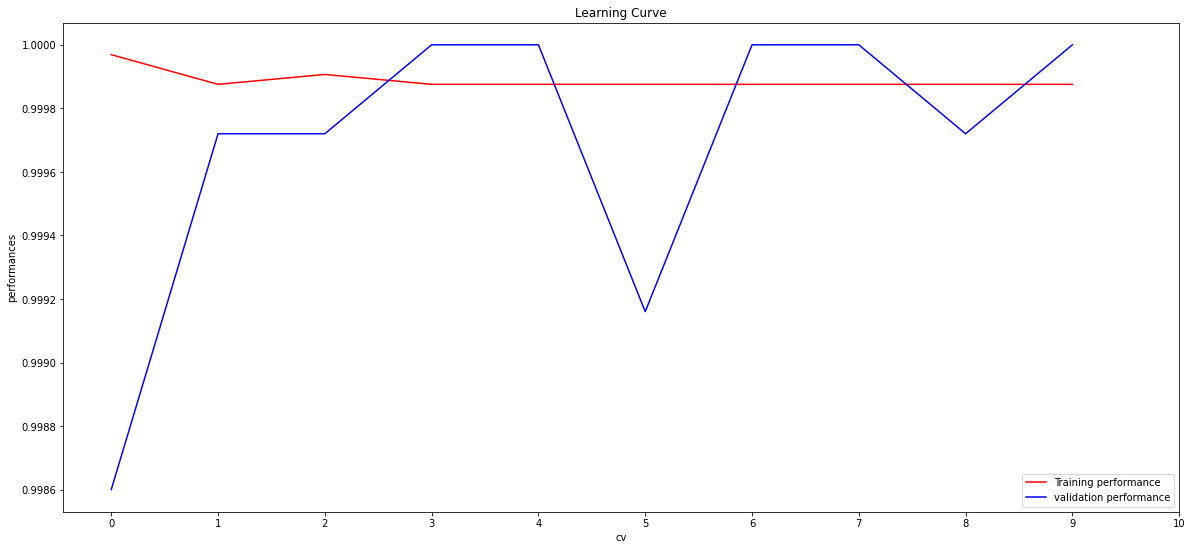

In [39]:
# Instantiating Algorithm
dtc = DecisionTreeClassifier()

# Training and validation
out = learning_curve(dtc, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [40]:
# # Training the Algorithm
dtc.fit(X_train,y_train)

# Testing the Algorithm
dtc_pred = dtc.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,dtc_pred)*100} %")
print(classification_report(y_test,dtc_pred))

performance: 99.9888030455716 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8331
           1       1.00      1.00      1.00       600

    accuracy                           1.00      8931
   macro avg       1.00      1.00      1.00      8931
weighted avg       1.00      1.00      1.00      8931



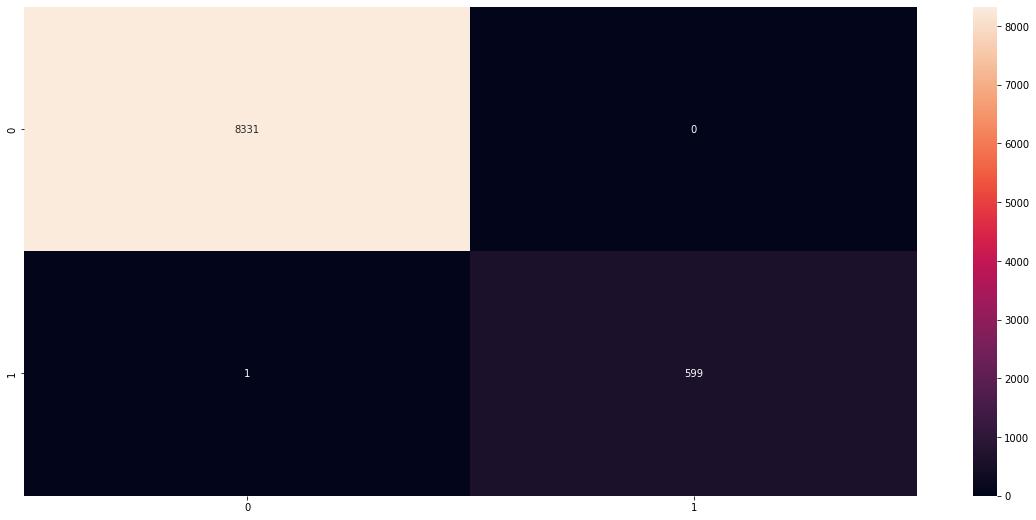

In [41]:
sns.heatmap(confusion_matrix(y_test,dtc_pred),annot=True,fmt="d")
plt.show()


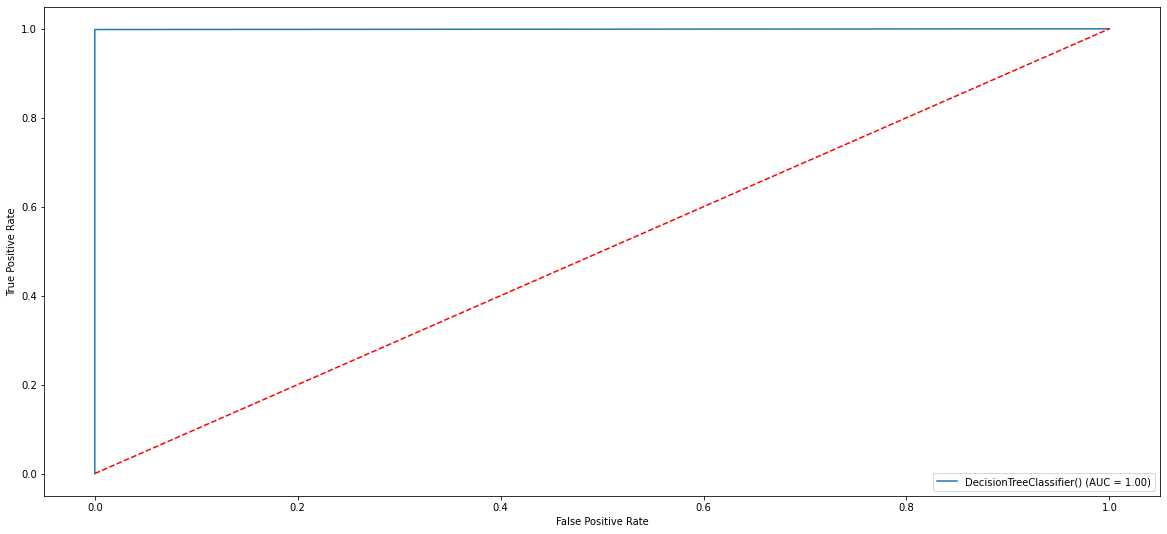

In [42]:
fpr, tpr, thresholds = roc_curve(y_test,dtc_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=dtc)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

Random Forest Classifier

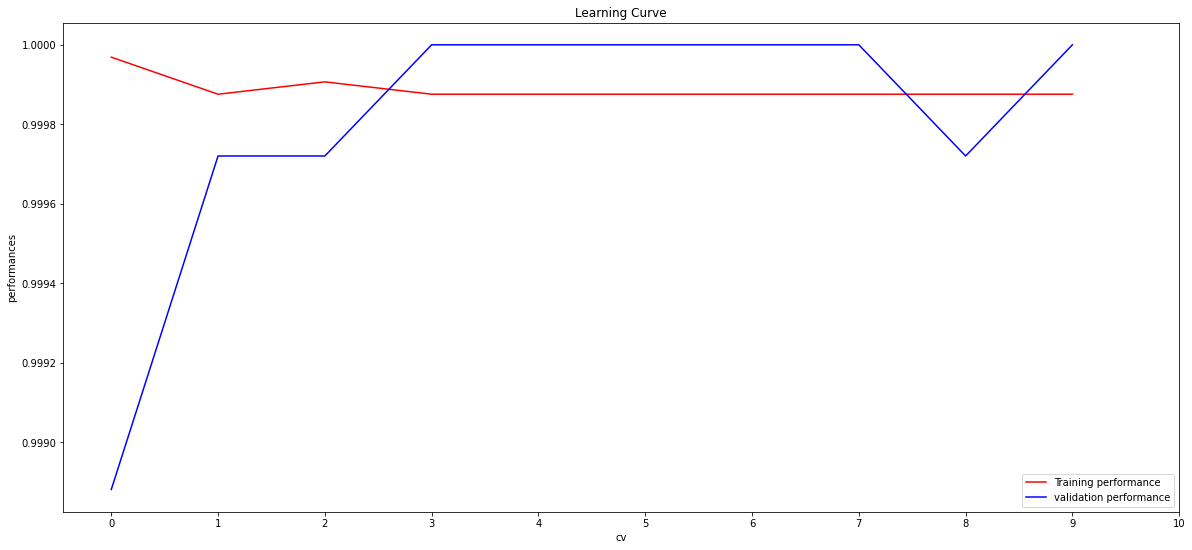

In [43]:
# Instantiating Algorithm
rfc = RandomForestClassifier(random_state=0)

# Training and validation
out = learning_curve(rfc, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [44]:
# Training the Algorithm
rfc.fit(X_train,y_train)

# Testing the Algorithm
rfc_pred = rfc.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,rfc_pred)*100} %")
print(classification_report(y_test,rfc_pred))

performance: 99.9888030455716 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8331
           1       1.00      1.00      1.00       600

    accuracy                           1.00      8931
   macro avg       1.00      1.00      1.00      8931
weighted avg       1.00      1.00      1.00      8931



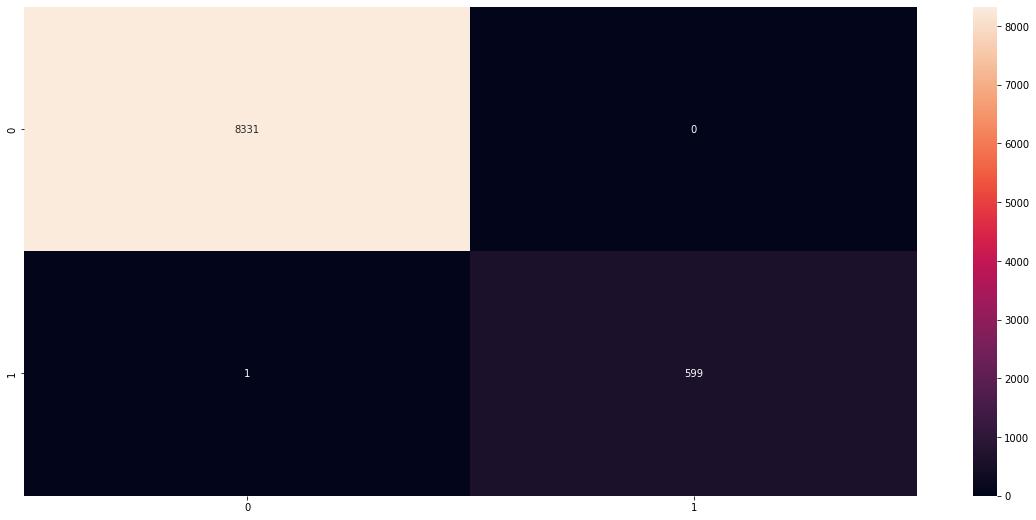

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt="d")
plt.show()

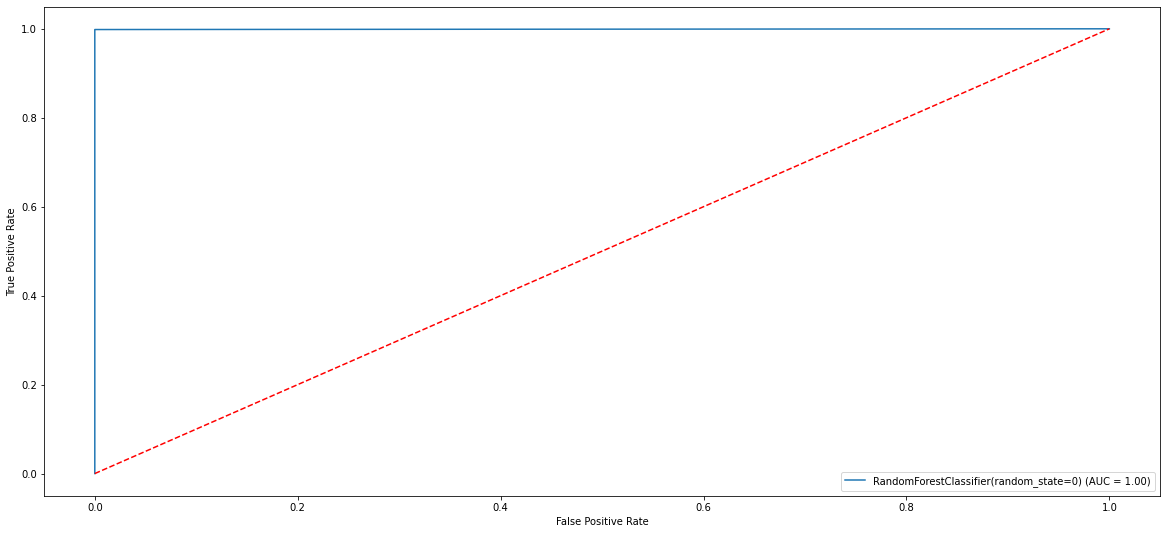

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

Support Vector Machine

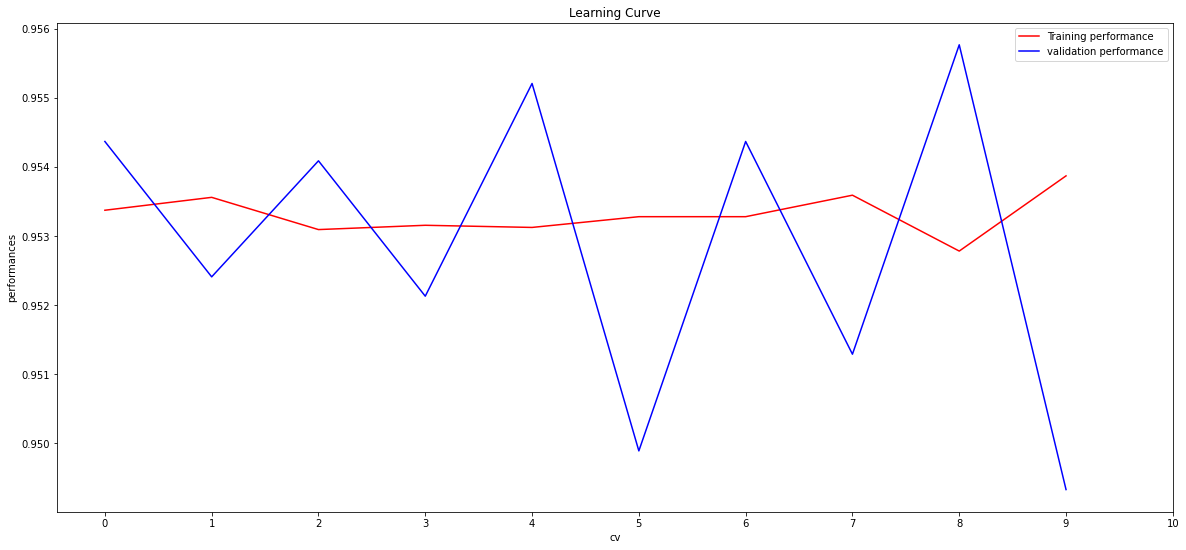

In [46]:
# Instantiating Algorithm
svm = SVC()

# Training and validation
out = learning_curve(svm, X_train, y_train, train_sizes=[1.0], cv=10)
plt.plot(out[1][0],color="r",label="Training performance")
plt.plot(out[2][0],color="b",label="validation performance")
plt.title("Learning Curve")
plt.ylabel("performances")
plt.xlabel("cv")
plt.xticks(range(11))
plt.legend()
plt.show()

In [47]:
# Training the Algorithm
svm.fit(X_train,y_train)

# Testing the Algorithm
svm_pred = svm.predict(X_test)

# evaluation
print(f"perfomance: {accuracy_score(y_test,svm_pred)*100} %")
print(classification_report(y_test,svm_pred))

perfomance: 95.7675512260665 %
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8331
           1       0.79      0.51      0.62       600

    accuracy                           0.96      8931
   macro avg       0.88      0.75      0.80      8931
weighted avg       0.95      0.96      0.95      8931



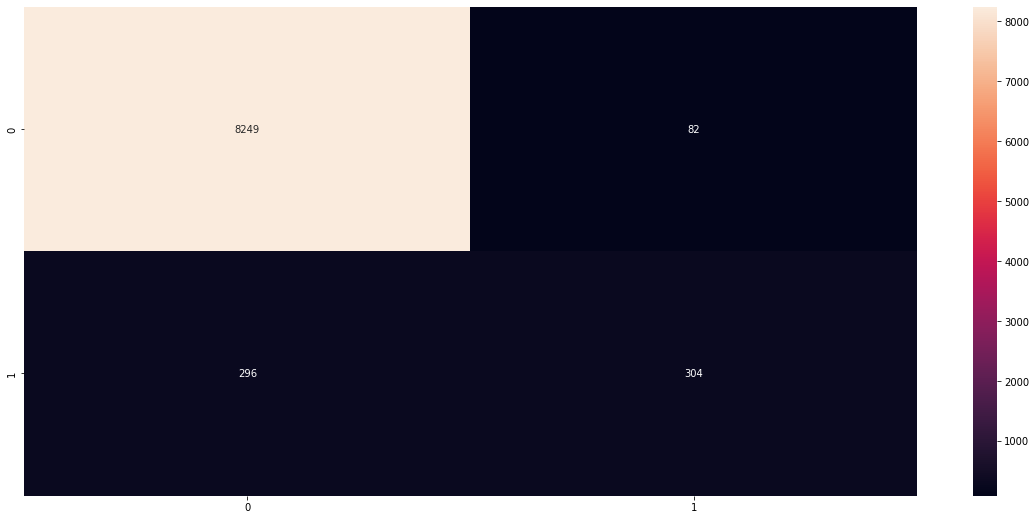

In [48]:
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")
plt.show()

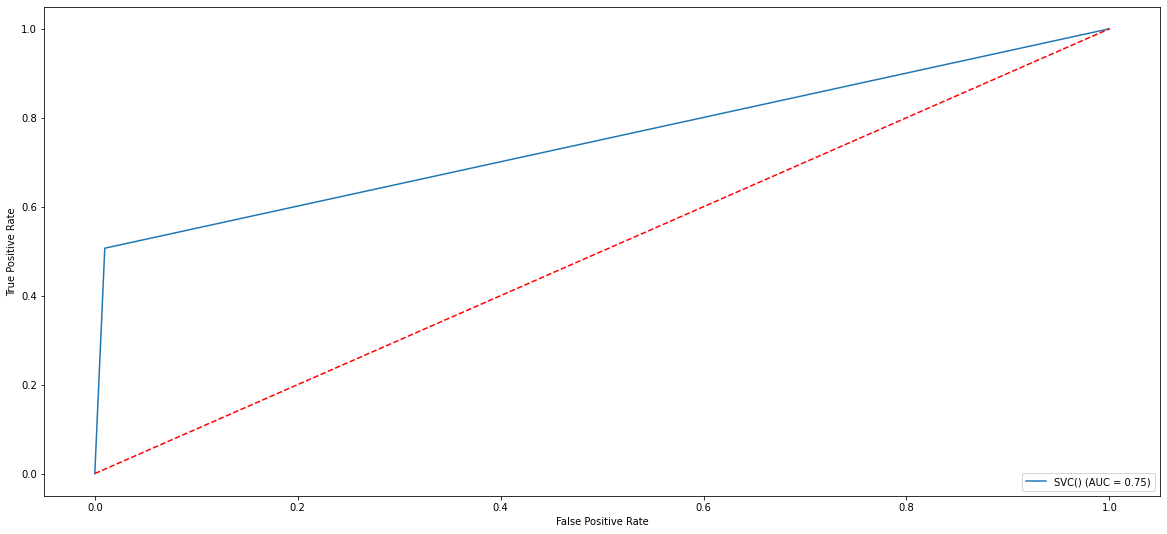

In [49]:
fpr, tpr, thresholds = roc_curve(y_test,svm_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=svm)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

Grid Search

1. Random Forest

In [50]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = [
  {"random_state":[0,1,2,3,4,5,6,7,8,9],
   "n_estimators":[50,100],
   'max_depth': [10, 20, 30, None],
   'min_samples_leaf': [1, 2, 4],
   'min_samples_split': [2, 3]}
 ]

gcv_results = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)
gcv_results

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [10, 20, 30, None],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 3],
                          'n_estimators': [50, 100],
                          'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='accuracy')

In [ ]:
gcv_results.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 0}

In [ ]:
gcv_results.best_score_

0.9998040313549831

In [ ]:
gcv_results.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)

In [ ]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)


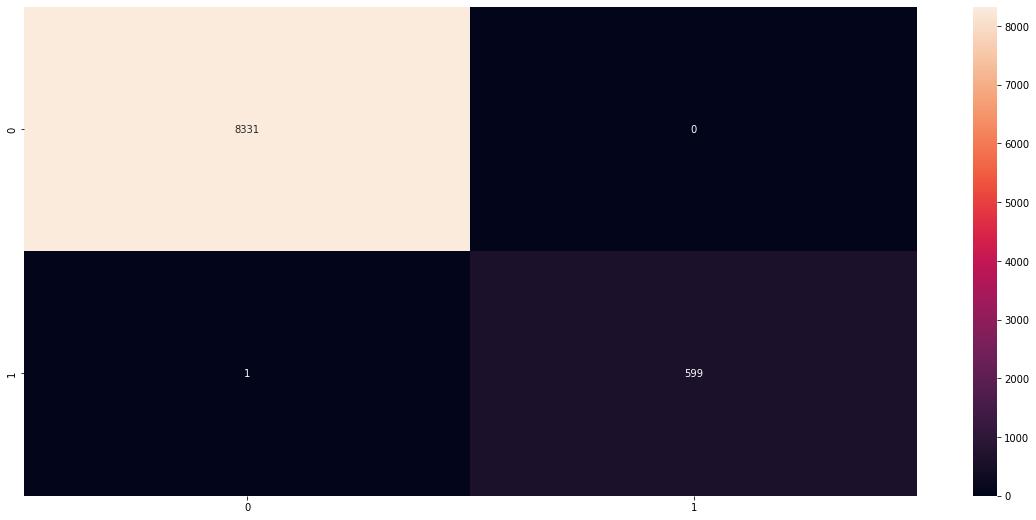

In [ ]:
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt="d")
plt.show()

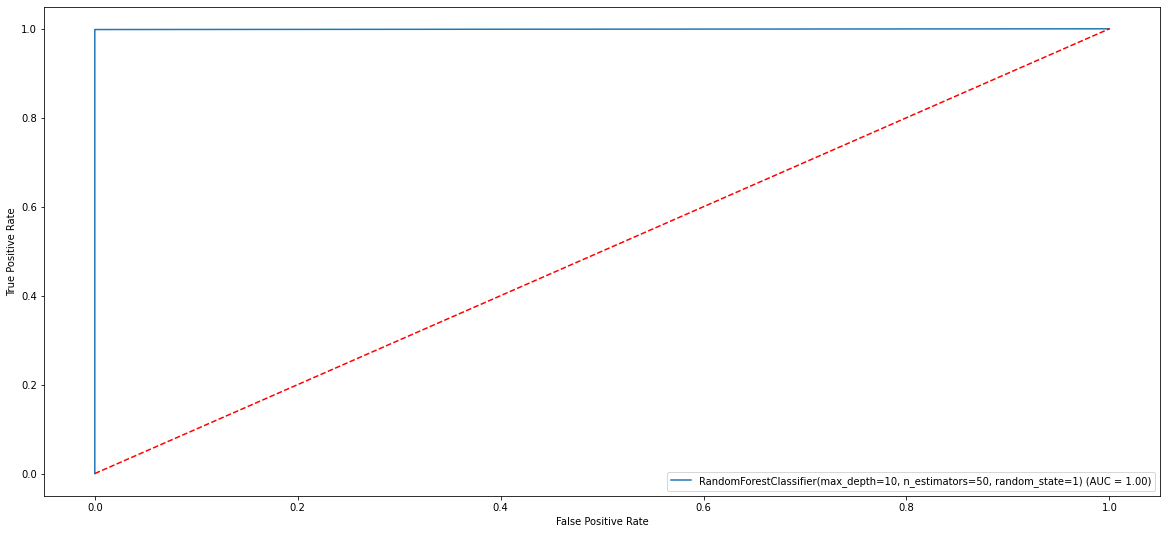

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

2. Logistic Regression

In [ ]:
log.get_params()

In [ ]:
param_grid = [
  {"random_state":[0,1,2,3,4,5,6,7,8,9],
   'C': [1, 10, 100, 1000],
   'class_weight': [None, 'balanced']}
 ]

gcv_results = GridSearchCV(estimator=log, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)
gcv_results

In [ ]:
gcv_results.best_params_

In [ ]:
gcv_results.best_score_

In [ ]:
gcv_results.best_estimator_

In [ ]:
log = LogisticRegression(C=100, random_state=0, solver='liblinear',class_weight=None)

# Training the Algorithm
log.fit(X_train,y_train)

# Testing the Algorithm
log_pred = log.predict(X_test)

# evaluation
print(f"performance: {accuracy_score(y_test,log_pred)*100} %")
print(classification_report(y_test,log_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test,log_pred),annot=True,fmt="d")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,log_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=log)
display.plot()
plt.plot([0,1],[0,1],linestyle="--",color="r")
plt.show()

##selected metric system:##
Accuracy Score

*  Precision Score
*  Recall
*  f1-Score
*  Confusion Matrix
*  ROC curve 



out of all the above metrics, 'accuracy' helped the most in many cases like Decision tree, Random Forest, Logistic Regression where rest of the metrics like Recall, F1-score, precision were are 100% except for SVM Algorithm. Confusion matrix and ROC curve helped to understand the model better.



Results:

we were able to classify the instances as having a hearing or not having with a very good performance of 99.96+ % even when there were few outliers were left in the data. Random Forest was best and decision tree was also performing close to best and SVM had many difficulties in classification as it is sensitive to the outliers.

Next steps:

1. we have only considered a sample data from the population. for the complete data the procedure for data pre-processing may change
2. all the outliers were not removed, few were left in the dataset. further understanding of the data in better way is possible.
3. much better algorithms can be researched on that can handle the outliers like voting classifier.
4. research can be done in finding a better representative sample. for training, validation and testing purposes by understanding the distributions of different random sample. And etc.


References:
1. https://medium.com/swlh/top-five-methods-to-identify-outliers-in-data-2777a87dd7fe
2. https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf